Import all libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset,DataLoader

from sklearn.model_selection import train_test_split

Read data file and split into 'X' and 'y' training and testing set. 

In [2]:
wine_data = pd.read_csv('winequality-white.csv',sep=';')

X = wine_data.drop('quality',axis=1)
y = wine_data['quality']

X_train_temp,X_test_temp,y_train_temp,y_test_temp = train_test_split(X,y,test_size=0.2,
                                                                     random_state=42)

y_train_temp = y_train_temp.to_frame()
y_test_temp = y_test_temp.to_frame()

Convert dataframe values into torch tensors.

In [3]:
X_train = torch.FloatTensor(X_train_temp.values)
y_train = torch.FloatTensor(y_train_temp.values)
X_test = torch.FloatTensor(X_test_temp.values)
y_test = torch.FloatTensor(y_test_temp.values)

Create the model object according to the specificitations, define the MSELoss criterion and the SGD optimizer. Then we run the NN for 100 epochs and plot the error minimization.

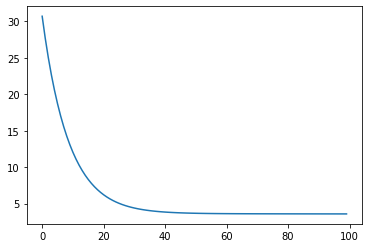

In [4]:
class LinearRegression(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(11, 11)
        self.fc2 = torch.nn.Linear(11, 11)
        self.fc3 = torch.nn.Linear(11, 11)
        self.output = torch.nn.Linear(11,1)
        
    def forward(self,x):
        out = self.fc1(x)
        out = self.fc2(out)
        out = self.fc3(out)
        y_pred = self.output(out)
        return y_pred
    
model = LinearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.00001)

error = []

for epoch in range(100):
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    error.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
plt.plot(error)

Create the dataset object for the white wine data file with a function to split into training and testing set. 

In [5]:
class White_Wine_Dataset(Dataset):
    
    def __init__(self, csv_file):
        data = pd.read_csv(csv_file, sep=';')
        self.X = data.iloc[:,:-1]
        self.Y = data.iloc[:,-1]
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        item = self.X[idx]
        label = self.Y[idx]
        return (item, label)
    
    def train_test_split(self):
        X_train,X_test,y_train,y_test = train_test_split(self.X,self.Y,test_size=0.2,
                                                         random_state=42)
        train = pd.concat((X_train,y_train),axis=1)
        test = pd.concat((X_test,y_test),axis=1)
        
        train_dataset = torch.FloatTensor(train.values)
        test_dataset = torch.FloatTensor(test.values)
        
        return (train_dataset,test_dataset)

Create a new white wine object and split the data into train and test dataset; then print the train set to see how it looks.

In [6]:
wine_data = White_Wine_Dataset('winequality-white.csv')

train_dataset,test_dataset = wine_data.train_test_split()
print(train_dataset)

tensor([[ 7.3000,  0.1700,  0.3600,  ...,  0.4100, 12.4000,  6.0000],
        [ 6.3000,  0.2500,  0.4400,  ...,  0.5200,  9.5000,  5.0000],
        [ 5.6000,  0.3200,  0.3300,  ...,  0.4900, 11.1000,  6.0000],
        ...,
        [ 7.6000,  0.2700,  0.5200,  ...,  0.5300, 11.4000,  6.0000],
        [ 6.3000,  0.2400,  0.2900,  ...,  0.3800, 10.6000,  6.0000],
        [ 8.1000,  0.2700,  0.3500,  ...,  0.6300, 10.4000,  8.0000]])


Create two 'DataLoader' objects for the train and test set respectively.

In [7]:
batch_size = 1;

train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True);
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True);

Run the NN for 10 epochs, iterating over the data from the 'train_loader' previously created and then plot the error minimization.

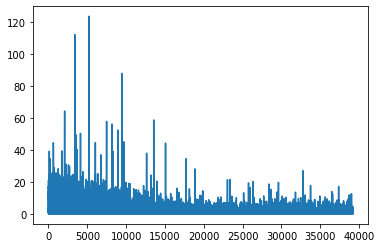

In [18]:
model = LinearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.00001)

error = []

for epoch in range(10):
    for i,tensor in enumerate(train_loader):
        X_train = tensor[0][:-1]
        y_train = tensor[0][-1]
        
        y_pred = model(X_train)
        loss = criterion(y_pred,y_train)
        error.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
plt.plot(error)

**References:**

https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5


https://www.geeksforgeeks.org/linear-regression-using-pytorch/


https://www.youtube.com/watch?v=Zy6CIMirxKM